# Package Download and Installation

In [0]:
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

from gensim.models.fasttext import FastText

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


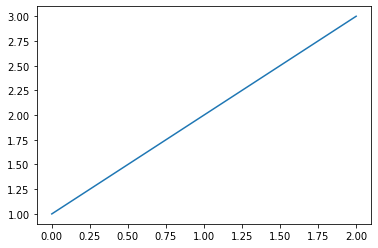

In [0]:
%matplotlib inline
plt.plot([1,2,3])
plt.show()

In [0]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install unidecode

     |████████████████████████████████| 51kB 3.3MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144667 sha256=fb5174304a14d33da11f1f2c39ebc05ba32b15c3be7f4c2316446ab9a65da134
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein
     |████████████████████████████████| 245kB 7.4MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Indonesian FastText Downloading and Loading

## Install FastText, and Download Datasets

In [0]:
# !git clone https://github.com/facebookresearch/fastText.git
# import os
# os.chdir('fastText')
# !pip install .
# os.chdir('..')

# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
# !gzip -d "cc.id.300.bin.gz"
# !cp "cc.id.300.bin" "/content/drive/My Drive/TA/FastTextIndonesia/cc.id.300.bin"

# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.id.zip
# !unzip wiki.id.zip
# !cp wiki.id.bin "/content/drive/My Drive/TA/FastTextIndonesia/wiki.id.bin"
# !cp wiki.id.vec "/content/drive/My Drive/TA/FastTextIndonesia/wiki.id.vec"

## Save A New FastText Model with Reduced Dimensions

In [0]:
# import fasttext
# import fasttext.util

# # Wiki and CommonCrawl
# ft = fasttext.load_model('/content/drive/My Drive/TA/FastTextIndonesia/cc.id.300.bin')
# print(ft.get_dimension())
# fasttext.util.reduce_model(ft, 100)
# print(ft.get_dimension())
# ft.save_model('/content/drive/My Drive/TA/FastTextIndonesia/cc.id.100.bin')

# # Wiki only
# ft = fasttext.load_model('/content/drive/My Drive/TA/FastTextIndonesia/wiki.id.bin')
# print(ft.get_dimension())
# fasttext.util.reduce_model(ft, 100)
# print(ft.get_dimension())
# ft.save_model('/content/drive/My Drive/TA/FastTextIndonesia/wiki.id.100.bin')

## Loads FastText Model

In [0]:
model = FastText.load_fasttext_format('/content/drive/My Drive/TA/FastTextIndonesia/cc.id.300.bin')
# model = FastText.load_fasttext_format('/content/drive/My Drive/TA/FastTextIndonesia/wiki.id.bin')
# model = FastText.load_fasttext_format('/content/drive/My Drive/TA/FastTextIndonesia/cc.id.100.bin')
# model = FastText.load_fasttext_format('/content/drive/My Drive/TA/FastTextIndonesia/wiki.id.100.bin')

EMBEDDING_SIZE = len(model.wv['a'])
print(EMBEDDING_SIZE)
print(len(model.wv.vocab))

300
2000000


In [0]:
print("algoritmatik" in model.wv.vocab)
# print(model.wv.most_similar("algoritmatik"))

False


# Loading Data

In [0]:
# SQUAD_DATASET_PATH = '/content/drive/My Drive/TA/data/processed/train-v2.0-translated_fixed.json'
SQUAD_DATASET_PATH = '/content/drive/My Drive/TA/data/processed/train-v2.0-translated_fixed_enhanced.json'

df_squad = pd.read_json(SQUAD_DATASET_PATH)
# df_squad = df_squad.drop(columns=['failure_percentage', 'total_questions'])
print(df_squad.shape)
print(df_squad)

(442, 2)
                                           title                                         paragraphs
0                                        Beyonce  [{'qas': [{'question': 'Kapan Beyonce mulai me...
1                                Frédéric Chopin  [{'qas': [{'question': 'Bagaimana kewarganegar...
2    Hubungan Tiongkok-Tibet selama dinasti Ming  [{'qas': [{'question': 'Siapakah Wang Jiawei d...
3                                           IPod  [{'qas': [{'question': 'Perusahaan mana yang m...
4         The Legend of Zelda: Twilight Princess  [{'qas': [{'question': 'Apa kategori game Lege...
..                                           ...                                                ...
437                                      Infeksi  [{'qas': [{'question': 'Dari sejumlah besar mi...
438                                      Berburu  [{'qas': [{'question': 'Apa praktik membunuh a...
439                                    Kathmandu  [{'qas': [{'question': 'Negara mana Kathm

In [0]:
# TAKEN_DATA_INDEX = 288

# df_squad = df_squad[df_squad.index <= TAKEN_DATA_INDEX]
print(df_squad.iloc[-1]['paragraphs'][-1].get('entities'))
print(df_squad.iloc[-1]['paragraphs'][-1].get('postags'))

[]
[[['Istilah', 'NNO'], ['"', 'PUN'], ['materi', 'NNO'], ['"', 'PUN'], ['digunakan', 'VBP'], ['di', 'PPO'], ['seluruh', 'KUA'], ['fisika', 'NNO'], ['dalam', 'PPO'], ['beragam', 'KUA'], ['konteks', 'NNO'], ['yang', 'PRR'], ['membingungkan', 'VBT'], [':', 'PUN'], ['misalnya', 'ADV'], [',', 'PUN'], ['seseorang', 'PRN'], ['merujuk', 'VBT'], ['pada', 'PPO'], ['"', 'PUN'], ['fisika', 'NNO'], ['benda', 'NNO'], ['terkondensasi', 'VBP'], ['"', 'PUN'], [',', 'PUN'], ['"', 'PUN'], ['materi', 'NNO'], ['dasar', 'NNO'], ['"', 'PUN'], [',', 'PUN'], ['"', 'PUN'], ['materi', 'NNO'], ['partonik', 'NNO'], ['"', 'PUN'], [',', 'PUN'], ['"', 'PUN'], ['materi', 'NNO'], ['gelap', 'ADJ'], ['"', 'PUN'], [',', 'PUN'], ['"', 'PUN'], ['anti', 'VBT'], ['"', 'PUN'], ['-', 'PUN'], ['matter', 'NNO'], [',', 'PUN'], ['"', 'PUN'], ['"', 'PUN'], ['materi', 'NNO'], ['"', 'PUN'], ['dan', 'CCN'], ['"', 'PUN'], ['nuklir', 'NNO'], ['"', 'PUN'], ['yang', 'PRR'], ['aneh', 'ADJ'], ['.', 'PUN'], ['Dalam', 'PPO'], ['diskusi', 'NNO

# Delete Unfound Answers from Dataset

In [0]:
total_questions_before = 0
total_questions = 0
for taken_topic_idx in range(df_squad.shape[0]):
    for taken_context_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
        i = 0
        qas = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['qas']
        while i < len(qas):
            total_questions_before += 1
            indonesian_answer = qas[i].get('indonesian_answers') or qas[i].get('indonesian_plausible_answers')
            if indonesian_answer[0]['answer_start'] < 0:
                qas.pop(i)
            else:
                i += 1
                total_questions += 1
print(f'Left: {total_questions}. Deleted: {total_questions_before-total_questions}')

Left: 120054. Deleted: 10265


# Prepare Tensors and Delete Unfound Answers on the Process

In [0]:
# print(model.wv.most_similar('adalah'))
# print(model.wv['∈'])
# print(model.wv.similarity('buddha', 'pisau'))
# print(model.wv.similarity('buddha', 'tripitaka'))

# print('frederic' in model.wv.vocab)
# print(model.wv.most_similar('frederic'))
# print('frédéric' in model.wv.vocab)
# print(model.wv.most_similar('frédéric'))

print(model.wv.most_similar('<unk'))
print(model.wv.most_similar('<sos>'))
print(model.wv.most_similar('<eos>'))
print(model.wv.most_similar('<pad>'))
print(model.wv.most_similar('</sos>'))
print(model.wv.most_similar('</eos>'))

[('a.304820776305590.74183.304813339639667', 0.790755033493042), ('eyJzZWFyY2hfc2lkIjoiYWE1ZmM0MzEzZWY2ZGZmZGRhNzVkN2QwOGI0NDM4ZWEiLCJxdWVyeSI6IkplbWUgSmFyYWkiLCJzZWFyY2hfdHlwZSI6IlNlYXJjaCIsInNlcXVlbmNlX2lkIjoyMDE1MDI5NjUsInBhZ2VfbnVtYmVyIjoxLCJmaWx0ZXJfdHlwZSI6IlNlYXJjaCIsImVudF9pZCI6MTk1NzQxOTQwNTMyODEzLCJwb3NpdGlvbiI6MywicmVzdWx0X3R5cGUiOjY5fQ', 0.7860679030418396), ('eyJzZWFyY2hfc2lkIjoiYWE1ZmM0MzEzZWY2ZGZmZGRhNzVkN2QwOGI0NDM4ZWEiLCJxdWVyeSI6IkplbWUgSmFyYWkiLCJzZWFyY2hfdHlwZSI6IlNlYXJjaCIsInNlcXVlbmNlX2lkIjoyMDA2NTQwOTY3LCJwYWdlX251bWJlciI6MSwiZmlsdGVyX3R5cGUiOiJTZWFyY2giLCJlbnRfaWQiOjExMTkzNDY3MzQ3NTc5OTUsInBvc2l0aW9uIjozLCJyZXN1bHRfdHlwZSI6Njl9', 0.780627429485321), ('eyJzZWFyY2hfc2lkIjoiYWE1ZmM0MzEzZWY2ZGZmZGRhNzVkN2QwOGI0NDM4ZWEiLCJxdWVyeSI6IkplbWUgSmFyYWkiLCJzZWFyY2hfdHlwZSI6IlNlYXJjaCIsInNlcXVlbmNlX2lkIjoyMDE1MDI5NjUsInBhZ2VfbnVtYmVyIjoxLCJmaWx0ZXJfdHlwZSI6IlNlYXJjaCIsImVudF9pZCI6MTQ0ODQ5NTkyMjEzMzM2MSwicG9zaXRpb24iOjQsInJlc3VsdF90eXBlIjo2OX0', 0.7786415219306946), ('8987551

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('2BAAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAAAEhQTFRFr73ZobTPusjdsMHZp7nVwtDhzNbnwM3fu8jdq7vUt8nbxtDkw9DhpbfSvMrfssPZqLvVztbno7bRrr7W1d', 0.7056541442871094), ('eyJzZWFyY2hfc2lkIjoiYWE1ZmM0MzEzZWY2ZGZmZGRhNzVkN2QwOGI0NDM4ZWEiLCJxdWVyeSI6IkplbWUgSmFyYWkiLCJzZWFyY2hfdHlwZSI6IlNlYXJjaCIsInNlcXVlbmNlX2lkIjoyMDE1MDI5NjUsInBhZ2VfbnVtYmVyIjoxLCJmaWx0ZXJfdHlwZSI6IlNlYXJjaCIsImVudF9pZCI6MTk1NzQxOTQwNTMyODEzLCJwb3NpdGlvbiI6MywicmVzdWx0X3R5cGUiOjY5fQ', 0.7027547359466553), ('eyJzZWFyY2hfc2lkIjoiYWE1ZmM0MzEzZWY2ZGZmZGRhNzVkN2QwOGI0NDM4ZWEiLCJxdWVyeSI6IkplbWUgSmFyYWkiLCJzZWFyY2hfdHlwZSI6IlNlYXJjaCIsInNlcXVlbmNlX2lkIjoyMDE1MDI5NjUsInBhZ2VfbnVtYmVyIjoxLCJmaWx0ZXJfdHlwZSI6IlNlYXJjaCIsImVudF9pZCI6MTQ0ODQ5NTkyMjEzMzM2MSwicG9zaXRpb24iOjQsInJlc3VsdF90eXBlIjo2OX0', 0.6862667798995972), ('Llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoc', 0.684326171875), ('Llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch', 0.6818172931671143), ('-6.176816960883929,106.21754497289658', 0.67856

## TextDict Class

In [0]:
class TextDict:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {}
        self.n_words = 0

    def addWords(self, list_of_words):
        for word in list_of_words:
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

## Context, NER, and POS Tags TextDict

In [0]:
PAD = '<pad>'
EOS = '<eos>'
SOS = '<sos>'
PADDING_TOKEN = 0
SOS_TOKEN = 2
EOS_TOKEN = 1

text_dict = TextDict('context')
text_dict.addWords([PAD, EOS, SOS])


NONE_NER_POS = '<none>'
NONE_NER_POS_TOKEN = 0

postags_textdict = TextDict('postags')
postags_textdict.addWords([NONE_NER_POS, 'NNO', 'NNP', 'PRN', 'PRR', 'PRI', 'PRK', 'ADJ', 'VBI', 'VBT', 'VBP', 'VBL', 'VBE', 'ADV', 'ADK', 'NEG', 'CCN', 'CSN', 'PPO', 'INT', 'KUA', 'NUM', 'ART', 'PAR', 'UNS', '$$$', 'SYM', 'PUN', 'TAME'])

ner_textdict = TextDict('entities')
ner_textdict.addWords([NONE_NER_POS, 'PER', 'NOR', 'FAC', 'ORG', 'GPE', 'LOC', 'PRO', 'EVT', 'WOA', 'LAW', 'LNG', 'DTE', 'TME', 'PCT', 'MON', 'QUA', 'ORD', 'CRD'])

## Preprocessor Functions

### Tokenizer

In [0]:
import re
import unicodedata
from unidecode import unidecode

# Complete punctuation from string.punctuation: !"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~

def unicode_to_ascii(s):
    return unidecode(s)
    # return ''.join(
    #     c for c in unicodedata.normalize('NFD', s)
    #     if unicodedata.category(c) != 'Mn'
    # )

non_ascii_regex = re.compile(r"[^\x00-\x7F\u2013]")
def remove_non_ascii(s):
    return re.sub(non_ascii_regex, r"", s)

def normalize_string(s):
    s = unicode_to_ascii(s)
    # s = remove_non_ascii(s)
    return s

punctuations = '!"#$%&\'()*+/;<=>@?[\\]^_`{|}~'
punctuations_regex = re.compile(r"([%s])" % punctuations)
real_separator_regex = re.compile(r"([\.,:][^a-zA-Z0-9])")
def tokenize(s):
    s = re.sub(punctuations_regex, r" \1 ", s)
    s = re.sub(real_separator_regex, r" \1", s)
    s = s.split()
    return s
text = '"Frédéric Chopin! adalah, (1907–1986) (1907-1986) anak-anak (children): gembala. Andi\'s sheep is an \'03 R&B player; 奉獻 km² Jīdū °5 вера ʰp". Totalnya 10.000 rupiah'
# text = 'Beyoncé Giselle Knowles-Carter (/ biːˈjɒnseɪ / bee-YON-say) (lahir 4 September 1981) adalah penyanyi, penulis lagu, produser dan aktris rekaman Amerika. Dilahirkan dan dibesarkan di Houston, Texas, ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak, dan mulai terkenal pada akhir 1990-an sebagai penyanyi utama grup gadis R&B Destiny\'s Child. Dikelola oleh ayahnya, Mathew Knowles, kelompok ini menjadi salah satu kelompok gadis terlaris di dunia sepanjang masa. Hiatus mereka melihat rilis album debut Beyoncé, Dangerously in Love (2003), yang menetapkan dia sebagai artis solo di seluruh dunia, memperoleh lima Grammy Awards dan menampilkan Billboard Hot 100 nomor satu single "Crazy in Love" dan "Baby Boy" .'
tokenize(normalize_string(text))

['"',
 'Frederic',
 'Chopin',
 '!',
 'adalah',
 ',',
 '(',
 '1907-1986',
 ')',
 '(',
 '1907-1986',
 ')',
 'anak-anak',
 '(',
 'children',
 ')',
 ':',
 'gembala',
 '.',
 'Andi',
 "'",
 's',
 'sheep',
 'is',
 'an',
 "'",
 '03',
 'R',
 '&',
 'B',
 'player',
 ';',
 'Feng',
 'Xian',
 'km2',
 'Jidu',
 'deg5',
 'vera',
 'hp',
 '"',
 '.',
 'Totalnya',
 '10.000',
 'rupiah']

### Padding

In [0]:
TAKEN_QUANTILE = 0.99 #@param {type:"number"}

def pad_tensor(tensor, value, length):
    tensor.extend([value for _ in range(length - len(tensor))])

def get_sentence_and_question_max_length():
    sentence_lengths = []
    for paragraph in df_squad['paragraphs']:
        for qas in paragraph:
            context_sentences = nltk.tokenize.sent_tokenize(qas['context'])
            for sentence in context_sentences:
                sentence_lengths.append(len(tokenize(normalize_string(sentence))))
    df_sentence_lengths = pd.DataFrame(sentence_lengths)
    sentence_lengths_desc = df_sentence_lengths.describe()
    print(sentence_lengths_desc, end='\n\n')

    question_lengths = []
    for paragraph in df_squad['paragraphs']:
        for qas in paragraph:
            for qa in qas['qas']:
                question_lengths.append(len(tokenize(qa['question'])))
    df_question_lengths = pd.DataFrame(question_lengths)
    question_lengths_desc = df_question_lengths.describe()
    print(question_lengths_desc, end='\n\n')

    sentence_quantile = df_sentence_lengths.quantile(TAKEN_QUANTILE)[0].astype(int)
    question_quantile = df_question_lengths.quantile(TAKEN_QUANTILE)[0].astype(int) + 1 # +1 for EOS token
    return sentence_quantile , question_quantile

SENTENCE_MAX_LENGTH, QUESTION_MAX_LENGTH = get_sentence_and_question_max_length()
QUESTION_MAX_LENGTH += 1    # include EOS_TOKEN
print(SENTENCE_MAX_LENGTH)
print(QUESTION_MAX_LENGTH)

                  0
count  95098.000000
mean      23.456571
std       13.168316
min        1.000000
25%       14.000000
50%       21.000000
75%       30.000000
max      437.000000

                   0
count  119948.000000
mean        9.814486
std         3.255853
min         1.000000
25%         8.000000
50%         9.000000
75%        12.000000
max        58.000000

30
14


In [0]:
# sentence_lengths = []
# sentences = []
# for paragraph in df_squad['paragraphs']:
#     for qas in paragraph:
#         context_sentences = nltk.tokenize.sent_tokenize(qas['context'])
#         for sentence in context_sentences:
#             sentence_lengths.append(len(tokenize(normalize_string(sentence))))
#             sentences.append(sentence)
# df_sentence_lengths = pd.DataFrame(sentence_lengths)
# sentence_lengths_desc = df_sentence_lengths.describe()
# print(sentence_lengths_desc, end='\n\n')

# idx = df_sentence_lengths[df_sentence_lengths[0]==SENTENCE_MAX_LENGTH]['sentence'].index.tolist()[0]
# sentences[idx]

### Answer Preprocessor

In [0]:
from fuzzywuzzy import fuzz

WORD_SIMILARITY_THRESHOLD = 80

def convert_charloc_to_wordloc(tokenized_context, tokenized_words, char_loc):
    if len(tokenized_words) == 0:
        return -2

    pointer_loc = 0
    i = 0
    j = 0
    while i < len(tokenized_context) and j < min(2, len(tokenized_words)):
        if char_loc-pointer_loc <= 5:
            if tokenized_context[i].isnumeric():
                similarity = fuzz.ratio(tokenized_context[i], tokenized_words[j])
            else:
                similarity = fuzz.partial_ratio(tokenized_context[i], tokenized_words[j])
            # print(f'{tokenized_context[i]} vs {tokenized_words[j]} = {similarity}')
            if similarity >= WORD_SIMILARITY_THRESHOLD:
                j += 1
        pointer_loc += len(tokenized_context[i]) + 1
        i += 1
    if j >= min(2, len(tokenized_words)):
        return i-j
    else:
        return -1

In [0]:
def is_end_punctuations(token):
    return token in '.!?'

def get_sentence_location_from_answer_word_index(tokenized_context, answer_word_idx):
    start_idx = answer_word_idx-1
    end_idx = answer_word_idx
    while start_idx > -1 and not is_end_punctuations(tokenized_context[start_idx]):
        start_idx -= 1
    while end_idx < len(tokenized_context)-1 and not is_end_punctuations(tokenized_context[end_idx]):
        end_idx += 1
    return start_idx+1, end_idx

context = 'Aku adalah. Anak gembala! Selalu riang.serta gembira? Karena aku raj!in bek?erja tak pernah lengah ataupun lelah.. Lalala'
tokenized_context = tokenize(normalize_string(context))
answer_idx = 0
start_idx, end_idx = get_sentence_location_from_answer_word_index(tokenized_context, answer_idx)
print(' '.join(tokenized_context[start_idx:end_idx+1]))

Aku adalah .


In [0]:
# for topic in df_squad.iloc[2]['paragraphs']:
#     print(topic['context'])

In [0]:
# context_idx = 0
# topic_idx = 0
# qa_idx = 2

# tokenized_context = tokenize(normalize_string(df_squad.iloc[context_idx]['paragraphs'][topic_idx]['context']))
# count_tobe_removed_chars = len(re.findall(non_ascii_regex, unicodeToAscii(df_squad.iloc[context_idx]['paragraphs'][topic_idx]['context']))) * 1.5
# print(count_tobe_removed_chars)
# qa = df_squad.iloc[context_idx]['paragraphs'][topic_idx]['qas'][qa_idx]
# indonesian_answer = qa.get('indonesian_answers') or qa.get('indonesian_plausible_answers')
# answer = indonesian_answer[0]
# tokenized_words = tokenize(normalize_string(answer['text']))
# print(df_squad.iloc[context_idx]['paragraphs'][topic_idx]['context'])
# print(answer['text'])
# print(tokenized_context)
# print(tokenized_words)
# print(qa)

# answer_idx = convert_charloc_to_wordloc(tokenized_context, tokenized_words, answer['answer_start'] - count_tobe_removed_chars)

# print(tokenized_context[answer_idx:answer_idx+len(tokenized_words)])
# print(tokenized_words)


# # def convert_word_to_word_embedding(tokenized_words, model, target_shape, conversion_purpose:str, taken_topic_idx=-1, taken_context_idx=-1, qas_idx=-1):
# #     tensor = []
# #     for i in range(len(tokenized_words)):
# #       try:
# #           word_embedding = model.wv[tokenized_words[i]]
# #       except KeyError as e:
# #           print(f'{conversion_purpose} exception {e} at topic_idx={taken_topic_idx}, taken_context_idx={taken_context_idx}, qas_idx={qas_idx}')
# #           word_embedding = model.wv[OOV_REPLACEMENT]
# #       finally:
# #           tensor.append(word_embedding)
# #     tensor = np.array(tensor)
# #     padded_tensor = np.zeros(target_shape)
# #     padded_tensor[:tensor.shape[0], :tensor.shape[1]] = tensor
# #     return padded_tensor

# #            input_weights_matrix.append(np.concatenate((context_tensor, answer_tensor), axis=1))

### NER Preprocessor

In [0]:
def create_ner_tensor(tokenized_context, entities, ner_textdict):
    ner_tensor = [0 for _ in range(len(tokenized_context))]

    if len(entities) == 0:
        return ner_tensor

    pointer_loc = 0
    i = 0
    j = 0
    k = 0
    entities_name = tokenize(entities[j]['name'])
    while i < len(tokenized_context) and entities_name != None:
        pointer_loc += len(tokenized_context[i]) + 1
        if entities[j]['begin_offset']-pointer_loc <= 0:
            similarity = fuzz.partial_ratio(tokenized_context[i], entities_name[k])
            # print(f'{tokenized_context[i]} vs {entities_name[k]} = {similarity}')
            if similarity >= WORD_SIMILARITY_THRESHOLD:
                ner_tensor[i] = ner_textdict.word2index[entities[j]['type']]
                k += 1
                if k == len(entities_name):
                    j += 1
                    k = 0
                    entities_name = None if j == len(entities) else tokenize(entities[j]['name'])
            i += 1
    
    return ner_tensor

context = df_squad.iloc[0]['paragraphs'][0].get('context')
print(context)
entities = df_squad.iloc[0]['paragraphs'][0].get('entities')
print(entities)
print(create_ner_tensor(tokenize(normalize_string(context)), entities, ner_textdict))

Beyoncé Giselle Knowles-Carter (/ biːˈjɒnseɪ / bee-YON-say) (lahir 4 September 1981) adalah penyanyi, penulis lagu, produser dan aktris rekaman Amerika. Dilahirkan dan dibesarkan di Houston, Texas, ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak, dan mulai terkenal pada akhir 1990-an sebagai penyanyi utama grup gadis R&B Destiny's Child. Dikelola oleh ayahnya, Mathew Knowles, kelompok ini menjadi salah satu kelompok gadis terlaris di dunia sepanjang masa. Hiatus mereka melihat rilis album debut Beyoncé, Dangerously in Love (2003), yang menetapkan dia sebagai artis solo di seluruh dunia, memperoleh lima Grammy Awards dan menampilkan Billboard Hot 100 nomor satu single "Crazy in Love" dan "Baby Boy" .
[{'begin_offset': 24, 'length': 6, 'name': 'Carter', 'type': 'PER'}, {'begin_offset': 34, 'length': 2, 'name': 'bi', 'type': 'NOR'}, {'begin_offset': 47, 'length': 14, 'name': 'bee-YON-say) (', 'type': 'WOA'}, {'begin_offset': 67, 'length': 17, 'name': '4 September 

### PosTags Preprocessor

In [0]:
FULL_MATCH = 100

def flatten(list):
    new_list = []
    for list_ in list:
        new_list.extend(list_)
    return new_list

def calc_n_gram_similarity(n, token_1, postags, j):
    n_gram = ''
    if j+n < len(postags):
        for k in range(n):
            n_gram += postags[j+k][0]
        # print(f'{n}-gram: {token_1} vs {n_gram} = {fuzz.ratio(token_1, n_gram)}')
        return fuzz.ratio(token_1, n_gram)
    else:
        return 0

MAX_N_GRAM = 5
def create_postags_tensor(tokenized_context, postags_, postags_textdict):
    pos_tensor = [0 for _ in range(len(tokenized_context))]

    if len(postags_) == 0:
        return pos_tensor

    average_sim = []
    j = 0
    postags = flatten(postags_)
    for i in range(len(tokenized_context)):
        n = 1
        found = False
        iter_limit = MAX_N_GRAM - max(0, i + 5 - len(tokenized_context))
        prev_n_gram_similarity = 0
        while n <= iter_limit and not found:
            n_gram_similarity = calc_n_gram_similarity(n, tokenized_context[i], postags, j)
            if n_gram_similarity == 0:
                pos_tensor[i] = NONE_NER_POS_TOKEN
                found = True
            elif n_gram_similarity != FULL_MATCH and n < iter_limit:
                if n_gram_similarity > prev_n_gram_similarity:
                    prev_n_gram_similarity = n_gram_similarity
                elif n_gram_similarity <= prev_n_gram_similarity:
                    j -= 1
                    pos_tensor[i] = postags_textdict.word2index[postags[j-n+1][1]]
                    # print(f'\t{tokenized_context[i]} {postags[j-n+1][1]}')
                    j += n
                    found = True
            elif n_gram_similarity >= WORD_SIMILARITY_THRESHOLD:
                pos_tensor[i] = postags_textdict.word2index[postags[j-n+1][1]]
                # print(f'\t{tokenized_context[i]} {postags[j-n+1][1]}')
                j += n
                found = True
            else:
                pos_tensor[i] = NONE_NER_POS_TOKEN
                found = True
            n += 1
        average_sim.append(n_gram_similarity if n_gram_similarity > prev_n_gram_similarity else prev_n_gram_similarity)
    # average_sim = sum(average_sim)/len(average_sim)
    # print(f'Average similarity: {average_sim:.2f}%')
    return pos_tensor

taken_topic_idx = 0
taken_content_idx = 10
context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('context')
print(context)
postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('postags')
print(postags)
print(create_postags_tensor(tokenize(normalize_string(context)), postags, postags_textdict))

Rekaman solo pertama Beyoncé adalah fitur pada Jay Z "'03 Bonnie & Clyde" yang dirilis pada Oktober 2002, memuncak pada nomor empat di chart US Billboard Hot 100. Album solo pertamanya Dangerously in Love dirilis pada 24 Juni 2003, setelah Michelle Williams dan Kelly Rowland merilis upaya solo mereka. Album ini terjual 317.000 kopi di minggu pertama, debut di atas Billboard 200, dan sejak itu terjual 11 juta kopi di seluruh dunia. Single utama album, "Crazy in Love", menampilkan Jay Z, menjadi single nomor satu Beyonce sebagai artis solo di AS. Single "Baby Boy" juga mencapai nomor satu, dan single, "Me, Myself and I" dan "Naughty Girl", keduanya mencapai lima besar. Album ini membuat Beyoncé meraih lima penghargaan yang saat itu mengikat rekor di Grammy Awards ke-46 Tahunan; Album R&B Kontemporer Terbaik, Penampilan Vokal Wanita R&B Terbaik untuk "Dangerously in Love 2", Lagu R&B Terbaik dan Kolaborasi Rap / Sung Terbaik untuk "Crazy in Love", dan Penampilan R&B Terbaik oleh Duo atau 

In [0]:
# results = []
# for taken_topic_idx in range(df_squad.shape[0]):
#     for taken_content_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
#         context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('context')
#         # print(context)
#         postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('postags')
#         # print(postags)
#         # print(create_postags_tensor(tokenize(normalize_string(context)), postags, postags_textdict))
#         _, result = create_postags_tensor(tokenize(normalize_string(context)), postags, postags_textdict)
#         results.append(result)
#         if result < 95:
#             print(f'{taken_topic_idx}, {taken_content_idx}, {result}')

## Action!

In [0]:
import string
import time 


input_tensors = []
is_answer_tensors = []
is_cased_tensors = []
is_number_tensors = []
ner_tensors = []
pos_tensors = []
target_tensors = []

deleted = 0

start_time = time.time()
for taken_topic_idx in range(df_squad.shape[0]):
    for taken_context_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
        context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['context']
        tokenized_context = tokenize(normalize_string(context))
        text_dict.addWords(tokenized_context)
        count_tobe_removed_chars = len(re.findall(non_ascii_regex, unicode_to_ascii(context))) * 1.5  # With assumption every nonascii is followed by space

        try:
            entities = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['entities']
            postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['postags']
        except KeyError:
            print(f'Key Error, skipped ({taken_topic_idx}, {taken_content_idx})')
            i += 1
            continue
        entities = create_ner_tensor(tokenized_context, entities, ner_textdict)
        postags = create_postags_tensor(tokenized_context, postags, postags_textdict)

        qas = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['qas']
        i = 0
        while i < len(qas):
            qa = qas[i]

            indonesian_answer = qa.get('indonesian_answers') or qa.get('indonesian_plausible_answers')
            # indonesian_answer = qa.get('indonesian_answers')
            # if indonesian_answer is None:
            #     print(f'Found impossible question, Skipped..')
            #     i += 1
            #     continue
            tokenized_answers = tokenize(normalize_string(indonesian_answer[0]['text']))
            answer_start = indonesian_answer[0]['answer_start'] - count_tobe_removed_chars
            answer_idx = convert_charloc_to_wordloc(tokenized_context, tokenized_answers, answer_start)
            if answer_idx < 0:
                print(f'Not found at topic_idx={taken_topic_idx}, taken_context_idx={taken_context_idx}, qas_idx={i}')
                deleted += 1
                qas.pop(i)
                continue

            sent_start_idx, sent_end_idx = get_sentence_location_from_answer_word_index(tokenized_context, answer_idx)
            tokenized_sentence = tokenized_context[sent_start_idx:sent_end_idx+1]
            answer_idx -= sent_start_idx
            sentence_tensor = [text_dict.word2index[word] for word in tokenized_sentence]
            if sent_end_idx-sent_start_idx+1 > SENTENCE_MAX_LENGTH:
                # print(f'Sentence too long, skipped ({taken_topic_idx}, {taken_content_idx})')
                i += 1
                continue

            ner_tensor = [entities[i] for i in range(sent_start_idx, sent_end_idx+1)]
            pos_tensor = [postags[i] for i in range(sent_start_idx, sent_end_idx+1)]
            pad_tensor(sentence_tensor, 0, SENTENCE_MAX_LENGTH)
            pad_tensor(ner_tensor, 0, SENTENCE_MAX_LENGTH)
            pad_tensor(pos_tensor, 0, SENTENCE_MAX_LENGTH)

            is_answer_tensor = []
            is_cased_tensor = []
            is_number_tensor = []
            for j in range(SENTENCE_MAX_LENGTH):
                is_answer_tensor.append(
                    1 if j in range(answer_idx, answer_idx+len(tokenized_answers)) \
                    else 0
                )
                is_number_tensor.append(
                    1 if j<len(tokenized_sentence) and tokenized_sentence[j].isnumeric() \
                    else 0
                )
                is_cased_tensor.append(
                    1 if j<len(tokenized_sentence) and tokenized_sentence[j][0].isupper() \
                    else 0
                )

            indonesian_question = qa['question']
            tokenized_questions = tokenize(normalize_string(indonesian_question))
            if len(tokenized_questions)+1 > QUESTION_MAX_LENGTH:
                # print(f'Question too long, skipped ({taken_topic_idx}, {taken_content_idx})')
                i += 1
                continue
            text_dict.addWords(tokenized_questions)
            # if tokenized_questions[0].lower() != "kapan":
            #     # print(f'Only accept "kapan" question. Skipping..')
            #     i += 1
            #     continue
            question_tensor = [text_dict.word2index[word] for word in tokenized_questions]
            question_tensor.append(EOS_TOKEN)
            pad_tensor(question_tensor, 0, QUESTION_MAX_LENGTH)

            input_tensors.append(sentence_tensor)
            is_answer_tensors.append(is_answer_tensor)
            is_cased_tensors.append(is_cased_tensor)
            is_number_tensors.append(is_number_tensor)
            ner_tensors.append(ner_tensor)
            pos_tensors.append(pos_tensor)
            target_tensors.append(question_tensor)

            i += 1
end_time = time.time()

total_questions = total_questions - deleted
print(f'Not found answers: {deleted}. Questions left: {total_questions - deleted}')
print(f'Execution time: {end_time-start_time}')

Not found answers: 0. Questions left: 119948
Execution time: 63.408782958984375


In [0]:
for i in range(len(input_tensors)):
    sentence_tensor = input_tensors[i]
    is_answer_tensor = is_answer_tensors[i]
    sentence = ' '.join([text_dict.index2word[word_idx] for word_idx in sentence_tensor])
    answer = ' '.join([text_dict.index2word[sentence_tensor[idx]] if is_answer_tensor[idx]==1 else '' for idx in range(len(is_answer_tensor))]).strip()
    print(sentence)
    print(f'Answer: {answer}')
    if i > 10:
        break

Dilahirkan dan dibesarkan di Houston , Texas , ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak , dan mulai terkenal pada akhir 1990-an sebagai penyanyi utama grup gadis R & B Destiny ' s Child . <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
Answer: pada akhir 1990-an
Dilahirkan dan dibesarkan di Houston , Texas , ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak , dan mulai terkenal pada akhir 1990-an sebagai penyanyi utama grup gadis R & B Destiny ' s Child . <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
Answer: menyanyi dan menari
Hiatus mereka melihat rilis album debut Beyonce , Dangerously in Love ( 2003 ) , yang menetapkan dia sebagai artis solo di seluruh dunia , memperoleh lima Grammy Awards dan menampilkan Billboar

In [0]:
def concat_feature_tensors(*args):
    n_features = len(args)
    assert n_features > 1
    concated = np.array(args[0]).reshape(len(args[0]), -1, 1)
    for i in range(n_features-1):
        concated = np.concatenate(
            (concated, np.array(args[i+1]).reshape(len(args[i+1]), -1, 1)),
            axis = -1
            )
    return concated

feature_tensors = concat_feature_tensors(is_answer_tensors, is_cased_tensors, is_number_tensors, ner_tensors, pos_tensors)

input_tensors = torch.from_numpy(np.array(input_tensors)).long().view(len(input_tensors), -1, 1).to(device)
feature_tensors = torch.tensor(feature_tensors).float().to(device)
target_tensors = torch.from_numpy(np.array(target_tensors)).long().view(len(target_tensors), -1, 1).to(device)
print(input_tensors.size())
print(feature_tensors.size())
print(target_tensors.size())

torch.Size([68127, 30, 1])
torch.Size([68127, 30, 5])
torch.Size([68127, 14, 1])


In [0]:
# Count rows which contain non-zero element
np.unique(np.array(is_answer_tensors).nonzero()[0]).shape

(116609,)

# Create Weights Matrix Embedding using FastText

In [0]:
OOV_REPLACEMENT = '<unk>'

print(len(text_dict.index2word))

weights_matrix = np.zeros((len(text_dict.index2word), EMBEDDING_SIZE))

def convert_word_to_word_embedding(word, model):
    try:
        word_embedding = model.wv[word]
    except KeyError as e:
        print(f'{type(e).__name__} exception: {e}.')
        word_embedding = model.wv[OOV_REPLACEMENT]
    return word_embedding

for i, word in text_dict.index2word.items():
    weights_matrix[i] = convert_word_to_word_embedding(word, model)
print(f'All unknown words will be replaced with {OOV_REPLACEMENT}')

weights_matrix = torch.from_numpy(weights_matrix)
print(weights_matrix.size())

103388
KeyError exception: 'all ngrams for word Ivy. absent from model'.
KeyError exception: 'all ngrams for word Zywny absent from model'.
KeyError exception: 'all ngrams for word Wii. absent from model'.
KeyError exception: 'all ngrams for word 14:28 absent from model'.
KeyError exception: 'all ngrams for word Cwn absent from model'.
KeyError exception: 'all ngrams for word fmr absent from model'.
KeyError exception: 'all ngrams for word Prme absent from model'.
KeyError exception: 'all ngrams for word dz: absent from model'.
KeyError exception: 'all ngrams for word VFH absent from model'.
KeyError exception: 'all ngrams for word 3:10 absent from model'.
KeyError exception: 'all ngrams for word ini: absent from model'.
KeyError exception: 'all ngrams for word nSr absent from model'.
KeyError exception: 'all ngrams for word ` absent from model'.
KeyError exception: 'all ngrams for word EF0 absent from model'.
KeyError exception: 'all ngrams for word gqh absent from model'.
KeyError ex

In [0]:
import gc
gc.collect()

1336

# Sequence to Sequence

In [0]:
def create_emb_layer(weights_matrix, non_trainable=False):
    vocab_size, embedding_dim = weights_matrix.size()
    emb_layer = nn.Embedding(vocab_size, embedding_dim)
    emb_layer.load_state_dict({'weight': weights_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, vocab_size, embedding_dim

## Encoder

In [0]:
class EncoderRNN(nn.Module):
    def __init__(self, weights_matrix, feature_tensors, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding, _, embedding_dim = create_emb_layer(weights_matrix)
        intermediate_dim = embedding_dim + feature_tensors.size(2)
        self.gru = nn.GRU(intermediate_dim, hidden_size)

    def forward(self, input, feature_tensor, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = torch.cat((embedded, feature_tensor.view(1, 1, -1)), 2)
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

## Decoder (Unused)

In [0]:
# class DecoderRNN(nn.Module):
#     def __init__(self, weights_matrix, hidden_size, output_size):
#         super(DecoderRNN, self).__init__()
#         self.hidden_size = hidden_size

#         self.embedding, _, embedding_dim = create_emb_layer(weights_matrix)
#         self.lstm = nn.LSTM(embedding_dim, hidden_size)
#         self.out = nn.Linear(hidden_size, output_size)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input, hidden):
#         output = self.embedding(input).view(1, 1, -1)
#         output = F.relu(output)
#         output, hidden = self.gru(output, hidden)
#         output = self.softmax(self.out(output[0]))
#         return output, hidden

#     def initHidden(self):
#         return torch.zeros(1, 1, self.hidden_size, device=device)

## Attention Decoder

In [0]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, weights_matrix, hidden_size, output_size, dropout_p=0.1, max_length=SENTENCE_MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding, _, embedding_dim = create_emb_layer(weights_matrix)
        self.attn = nn.Linear(embedding_dim + hidden_size, self.max_length)
        self.attn_combine = nn.Linear(embedding_dim + hidden_size, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        # embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Training

## Helper Function

In [0]:
import time
import math
import random
import os


os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return f'{m}m {s}s'


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return f'{asMinutes(s)} (- {asMinutes(rs)})'

## Beam Search Reference
https://github.com/budzianowski/PyTorch-Beam-Search-Decoding/blob/master/decode_beam.py

## Train

In [0]:
teacher_forcing_ratio = 1


def train(input_tensor, feature_tensor, target_tensor, encoder, decoder, criterion, max_length=SENTENCE_MAX_LENGTH):
    # encoder_hidden = (encoder.initHidden(), encoder.initHidden())
    encoder_hidden = encoder.initHidden()

    input_timestep = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_timestep):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], feature_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_TOKEN]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing
            if decoder_input.item() == EOS_TOKEN:
                break

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_TOKEN:
                break

    loss.backward()

    return loss.item() / di

In [0]:
SAVE_PATH = '/content/drive/My Drive/TA/Checkpoints/checkpoint_gru.tar'
N_TAKEN_DATA = input_tensors.size(0)

def create_optimizer(optimizer, parameters, lr, betas=(0.9, 0.999)):
    if optimizer == 'sgd':
        return optim.SGD(parameters, lr)
    elif optimizer == 'adam':
        return optim.Adam(parameters, lr, betas)

def trainIters(encoder, decoder, n_epochs, batch_size=1, checkpoint=None, print_every=1000, plot_every=100, save_every=-1, learning_rate=0.01, optimizer='adam'):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every
    prev_epoch = 1
    prev_iter = 0

    encoder_optimizer = create_optimizer(optimizer, encoder.parameters(), lr=learning_rate)
    decoder_optimizer = create_optimizer(optimizer, decoder.parameters(), lr=learning_rate)
    # encoder_lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(encoder_optimizer, step_scheduler)
    # decoder_lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(decoder_optimizer, step_scheduler)
    criterion = nn.NLLLoss()

    if checkpoint is not None:
        prev_epoch = checkpoint['epoch']
        prev_iter = checkpoint['iter']
        plot_losses = checkpoint['plot_losses']
        encoder.load_state_dict(checkpoint['encoder_state_dict'])
        encoder_optimizer.load_state_dict(checkpoint['encoder_optimizer_state_dict'])
        decoder.load_state_dict(checkpoint['decoder_state_dict'])
        decoder_optimizer.load_state_dict(checkpoint['decoder_optimizer_state_dict'])
        print_loss_total = checkpoint['loss']
        plot_loss_total = checkpoint['loss']
        # encoder_lr_scheduler.load_state_dict(checkpoint['scheduler'])
        # decoder_lr_scheduler.load_state_dict(checkpoint['scheduler'])
        encoder.train()
        decoder.train()

    n_iters = N_TAKEN_DATA

    prev_epoch = epoch_start = prev_epoch + (prev_iter + 1) // n_iters
    prev_iter  = iter_start  = (prev_iter + 1) % n_iters

    print(f'Starting from epoch-{epoch_start}')
    print(f'Starting from iteration-{iter_start}')
    for epoch in range(epoch_start, n_epochs + 1):
        for iter in range(iter_start + 1, n_iters + 1):
            input_tensor = input_tensors[iter % n_iters]
            feature_tensor = feature_tensors[iter % n_iters]
            target_tensor = target_tensors[iter % n_iters]

            if iter % batch_size == 0:
                encoder_optimizer.zero_grad()
                decoder_optimizer.zero_grad()

            loss = train(input_tensor, feature_tensor, target_tensor, encoder,
                        decoder, criterion)
            print_loss_total += loss
            plot_loss_total += loss

            # opt.param_groups[0]['lr'] = 1e-4
            # lr_scheduler.base_lrs=[1e-4]
            # print('change', lr_scheduler.state_dict())

            if iter % batch_size == batch_size-1 or iter == n_iters:
                encoder_optimizer.step()
                decoder_optimizer.step()

            # if iter == n_iters:
            #     encoder_lr_scheduler.step()
            #     decoder_lr_scheduler.step()

            if iter % print_every == 0:
                print_loss_avg = print_loss_total / print_every
                print_loss_total = 0
                progress_percent = ((epoch-1)*(n_iters)+iter - ((prev_epoch-1)*n_iters+prev_iter)) / (max(1, n_epochs-prev_epoch)*(n_iters-prev_iter))
                print('%s (%d-%d %.2f%%) %.4f' % \
                      (timeSince(start, progress_percent),
                      epoch, iter, progress_percent * 100, print_loss_avg))
                # print(f'LR: {encoder_lr_scheduler.get_lr()}')

            if iter % plot_every == 0:
                plot_loss_avg = plot_loss_total / plot_every
                plot_losses.append(plot_loss_avg)
                plot_loss_total = 0

            if (save_every != -1 and iter % save_every == 0) or iter==n_iters:
                torch.save({
                    'epoch': epoch,
                    'iter': iter,
                    'plot_losses': plot_losses,
                    'encoder_state_dict': encoder.state_dict(),
                    'encoder_optimizer_state_dict': encoder_optimizer.state_dict(),
                    'decoder_state_dict': decoder.state_dict(),
                    'decoder_optimizer_state_dict': decoder_optimizer.state_dict(),
                    'loss': loss
                    # 'scheduler': encoder_lr_scheduler.state_dict()
                }, SAVE_PATH)
        iter_start = 0
        # encoder_lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(encoder_optimizer, step_scheduler)
        # decoder_lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(decoder_optimizer, step_scheduler)

    return plot_losses

# Plotting Results

In [0]:
plt.switch_backend('agg')
import matplotlib.ticker as ticker


def showPlot(points, save=False, path='./figures.jpg'):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
    if save:
        plt.savefig(path)
    else:
        plt.show()

# Evaluation

In [0]:
def evaluate(encoder, decoder, input_tensor, feature_tensor, max_length=SENTENCE_MAX_LENGTH):
    with torch.no_grad():
        # input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        # encoder_hidden = (encoder.initHidden(), encoder.initHidden())
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     feature_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_TOKEN]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_TOKEN:
                decoded_words.append('<eos>')
                break
            else:
                decoded_words.append(text_dict.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [0]:
def evaluateRandomly(encoder, decoder, n=10):
    for _ in range(n):
        i = random.randint(0, input_tensors.size()[0])
        input_tensor = input_tensors[i]
        feature_tensor = feature_tensors[i]
        target_tensor = target_tensors[i]
        is_answer_tensor = feature_tensor[:,0]
        input_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in input_tensor])
        output_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in target_tensor])
        answer_text = ' '.join([text_dict.index2word[input_tensor[idx].item()] if is_answer_tensor[idx]==1 else '' for idx in range(len(is_answer_tensor))]).strip()
        print('>', input_text)
        print('=', output_text)
        print('-', answer_text)
        output_words, attentions = evaluate(encoder, decoder, input_tensor, feature_tensor)
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [0]:
output_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in target_tensors[0]])
print(output_text)

Kapan Beyonce mulai menjadi populer ? <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


# Train & Evaluate

Streaming output truncated to the last 5000 lines.
226m 34.44756555557251s (- 94m 7.524029695698118s) (1-48132 70.65%) 5.0008
226m 35.333359479904175s (- 94m 6.292909304305795s) (1-48136 70.66%) 4.1365
226m 36.16644859313965s (- 94m 5.039963606039237s) (1-48140 70.66%) 5.0233
226m 37.150224447250366s (- 94m 3.8496341135687544s) (1-48144 70.67%) 4.3115
226m 38.05589532852173s (- 94m 2.6269286304159323s) (1-48148 70.67%) 4.9030
226m 39.04178023338318s (- 94m 1.4375518714441569s) (1-48152 70.68%) 4.7335
226m 39.958444356918335s (- 94m 0.21950144848960917s) (1-48156 70.69%) 6.0487
226m 40.93437910079956s (- 93m 59.02607503282343s) (1-48160 70.69%) 5.3394
226m 41.78388428688049s (- 93m 57.78028117058784s) (1-48164 70.70%) 5.8234
226m 42.63197612762451s (- 93m 56.53396747838269s) (1-48168 70.70%) 5.7560
226m 43.50951409339905s (- 93m 55.29991807796978s) (1-48172 70.71%) 6.8950
226m 44.50655698776245s (- 93m 54.115419168923836s) (1-48176 70.71%) 5.2957
226m 45.35634469985962s (- 93m 52.869985

<Figure size 432x288 with 0 Axes>

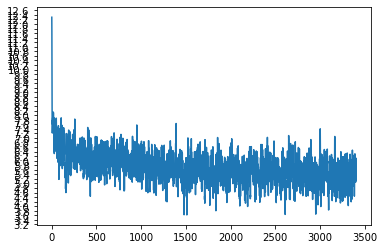

In [158]:
LOAD = False #@param {type:"boolean"}
N_EPOCHS =  1 #@param {type:"integer"}
BATCH_SIZE = 4 #@param {type:"integer"}
PRINT_EVERY = 4 #@param {type:"integer"}
PLOT_EVERY = 20 #@param {type:"integer"}
SAVE_EVERY = 100 #@param {type:"integer"}
LEARNING_RATE = 1e-3 #@param {type:"number"}
OPTIMIZER = "adam" #@param ["sgd", "adam"]
# STEP_SCHEDULER = 100 #@param {type:"integer"}
# RESET_LR_EVERY_N_FRACTION_EPOCHS = 0.5 #@param {type:"number"}
# LR_MULTIPLIER = 0.5 #@param {type:"number"}

hidden_size = 256 #@param {type:"integer"}

try:
    checkpoint = torch.load(SAVE_PATH) if LOAD else None
except Exception as e:
    print(f'Unable to load checkpoint. Starting training from scratch.')
    checkpoint = None

encoder1 = EncoderRNN(weights_matrix, feature_tensors, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(weights_matrix, hidden_size, text_dict.n_words, dropout_p=0.1).to(device)

history = trainIters(encoder1, attn_decoder1, n_epochs=N_EPOCHS, batch_size=BATCH_SIZE, checkpoint=checkpoint, print_every=PRINT_EVERY, plot_every=PLOT_EVERY, save_every=SAVE_EVERY, learning_rate=LEARNING_RATE, optimizer=OPTIMIZER)
showPlot(history)

In [0]:
# !cp "/content/drive/My Drive/TA/Checkpoints/checkpoint_gru.tar" "/content/drive/My Drive/TA/Checkpoints/checkpoint_gru_50epochs_4206data.tar"
# !cp "/content/drive/My Drive/TA/Checkpoints/checkpoint_gru_15epochs_4204data.tar" "/content/drive/My Drive/TA/Checkpoints/checkpoint_gru.tar"

In [0]:
evaluateRandomly(encoder1, attn_decoder1)

In [0]:
encoder = encoder1
decoder = attn_decoder1

for i in range(0, min(100, N_TAKEN_DATA)):
    input_tensor = input_tensors[i]
    feature_tensor = feature_tensors[i]
    target_tensor = target_tensors[i]
    is_answer_tensor = feature_tensor[:,0]
    input_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in input_tensor])
    output_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in target_tensor])
    answer_text = ' '.join([text_dict.index2word[input_tensor[idx].item()] if is_answer_tensor[idx]==1 else '' for idx in range(len(is_answer_tensor))]).strip()
    print('>', input_text)
    print('=', output_text)
    print('-', answer_text)
    output_words, attentions = evaluate(encoder, decoder, input_tensor, feature_tensor)
    output_sentence = ' '.join(output_words)
    print('<', output_sentence)
    print()

## Visualize Attention

In [0]:
# output_words, attentions = evaluate(
#     encoder1, attn_decoder1, "je suis trop froid .")
# plt.matshow(attentions.numpy())

For a better viewing experience we will do the extra work of adding axes
and labels:




In [0]:
# def showAttention(input_sentence, output_words, attentions):
#     # Set up figure with colorbar
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     cax = ax.matshow(attentions.numpy(), cmap='bone')
#     fig.colorbar(cax)

#     # Set up axes
#     ax.set_xticklabels([''] + input_sentence.split(' ') +
#                        ['<EOS>'], rotation=90)
#     ax.set_yticklabels([''] + output_words)

#     # Show label at every tick
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

#     plt.show()


# def evaluateAndShowAttention(input_sentence):
#     output_words, attentions = evaluate(
#         encoder1, attn_decoder1, input_sentence)
#     print('input =', input_sentence)
#     print('output =', ' '.join(output_words))
#     showAttention(input_sentence, output_words, attentions)


# evaluateAndShowAttention("elle a cinq ans de moins que moi .")

# evaluateAndShowAttention("elle est trop petit .")

# evaluateAndShowAttention("je ne crains pas de mourir .")

# evaluateAndShowAttention("c est un jeune directeur plein de talent .")